In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [2]:
%matplotlib inline

In [3]:
import plotly

In [4]:
import cufflinks as cf

In [5]:
cf.go_offline()

In [6]:
import seaborn as sns

In [7]:
import datetime

# Importing 5-year stock data

In [8]:
end = datetime.datetime.today()
tdelta = datetime.timedelta(days=15*355)
start = end - tdelta
tickers = ['HSY', 'SBUX', 'MSFT', 'AMZN', 'AAPL', 'MA', 'NEE', 'NKE', 'DIS', 'CSCO', 'BYND', 'ABT', 'NFLX', 'KO', 'DRI', 'UNP']

In [9]:
df = pdr.get_data_tiingo(tickers, api_key='257f9ad1a3a829f982dabb07df53780337dcb037', start=start, end=end)

In [10]:
df.reset_index(inplace=True)

In [11]:
df['Date'] = df['date'].apply(lambda x: x.date())
df.drop(['adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'divCash', 'splitFactor', 'date', 'adjVolume'], axis = 1, inplace=True)
df.head()

symbol  close   high    low   open   volume        Date
0    HSY  55.30  56.04  55.15  55.90   845100  2005-01-24
1    HSY  56.22  56.68  55.56  55.61   876900  2005-01-25
2    HSY  56.86  57.73  56.40  56.50  1280500  2005-01-26
3    HSY  58.19  58.19  56.95  56.99  1253100  2005-01-27
4    HSY  57.96  58.39  57.00  57.00  1115000  2005-01-28

In [12]:
stocks_df = df.pivot(index='Date', columns='symbol', values=['open', 'high', 'low', 'close', 'volume'])

In [13]:
stocks_df.head()

open                                                            \
symbol       AAPL    ABT   AMZN BYND   CSCO    DIS    DRI    HSY     KO  MA   
Date                                                                          
2005-01-24  70.98  45.99  41.32  NaN  18.16  28.15  27.73  55.90  40.95 NaN   
2005-01-25  71.41  45.94  40.60  NaN  17.90  28.18  27.80  55.61  41.15 NaN   
2005-01-26  72.68  45.97  41.18  NaN  17.80  28.91  28.25  56.50  41.15 NaN   
2005-01-27  72.16  45.79  41.27  NaN  17.77  28.43  28.64  56.99  41.68 NaN   
2005-01-28  72.62  45.40  42.09  NaN  18.27  28.20  29.00  57.00  41.53 NaN   

            ...     volume                                                    \
symbol      ...        DRI        HSY         KO  MA         MSFT        NEE   
Date        ...                                                                
2005-01-24  ...  1299600.0   845100.0  6820900.0 NaN   69010900.0  1344800.0   
2005-01-25  ...  1390000.0   876900.0  4854700.0 NaN   67580700.0  1085900.0   
2005-01-26  ...  1222900.0  1280500.0  7800500.0 NaN   64974500.0   816200.0   
2005-01-27  ...  1321000.0  1253100.0  5613200.0 NaN   93204100.0   631200.0   
2005-01-28  ...  1835900.0  1115000.0  6726500.0 NaN  110466500.0   785600.0   

                                                         
symbol           NFLX        NKE        SBUX        UNP  
Date                                                     
2005-01-24  3101700.0   850200.0   7793300.0  2683700.0  
2005-01-25  9550200.0   892900.0   5090200.0  2386200.0  
2005-01-26  2634600.0  1146500.0   5506900.0  1841100.0  
2005-01-27   987800.0  1081100.0  13350900.0  1083700.0  
2005-01-28  1337500.0  1274100.0   6308000.0  1356200.0  

[5 rows x 80 columns]

In [14]:
stocks_df = stocks_df.reorder_levels([1, 0], axis=1).sort_index(level=0, axis=1)

In [15]:
stocks_df.columns.names = ['Stocks Ticker', 'Stock Info']

In [16]:
stocks_df.head()

Stocks Ticker   AAPL                                     ABT                \
Stock Info     close   high    low   open      volume  close   high    low   
Date                                                                         
2005-01-24     70.76  71.78  70.55  70.98  15029100.0  45.93  46.34  45.85   
2005-01-25     72.05  72.84  70.94  71.41  17307700.0  45.91  46.25  45.80   
2005-01-26     72.25  72.75  71.22  72.68  13205300.0  45.89  46.32  45.87   
2005-01-27     72.64  72.92  71.55  72.16   8861200.0  45.46  46.05  45.38   
2005-01-28     73.98  73.98  72.44  72.62  14314500.0  45.27  45.54  44.89   

Stocks Ticker                    ...   SBUX                                   \
Stock Info      open     volume  ...  close   high    low   open      volume   
Date                             ...                                           
2005-01-24     45.99  8083500.0  ...  53.91  55.66  52.41  55.56   7793300.0   
2005-01-25     45.94  5464100.0  ...  54.00  55.15  53.82  53.90   5090200.0   
2005-01-26     45.97  6843400.0  ...  55.34  55.41  53.87  54.49   5506900.0   
2005-01-27     45.79  8253800.0  ...  53.03  55.20  52.28  54.95  13350900.0   
2005-01-28     45.40  8599200.0  ...  53.70  53.70  52.10  53.25   6308000.0   

Stocks Ticker    UNP                                  
Stock Info     close   high    low   open     volume  
Date                                                  
2005-01-24     58.94  60.50  58.94  60.50  2683700.0  
2005-01-25     59.40  60.35  59.04  59.04  2386200.0  
2005-01-26     58.86  59.60  58.25  59.60  1841100.0  
2005-01-27     59.33  59.66  58.57  58.64  1083700.0  
2005-01-28     58.90  59.79  58.84  59.30  1356200.0  

[5 rows x 80 columns]

# Computing Yearly, Monthly and Day of Week Rates

In [17]:
rates_df = pd.DataFrame()

In [18]:
for ticker in tickers:
    rates_df[ticker] = stocks_df[ticker]['close']
rates_df.head()

HSY   SBUX   MSFT   AMZN   AAPL  MA    NEE    NKE    DIS   CSCO  \
Date                                                                            
2005-01-24  55.30  53.91  25.67  40.38  70.76 NaN  74.65  86.31  27.95  17.75   
2005-01-25  56.22  54.00  26.02  40.94  72.05 NaN  73.83  85.89  28.80  17.51   
2005-01-26  56.86  55.34  26.01  41.34  72.25 NaN  75.15  85.15  28.58  17.69   
2005-01-27  58.19  53.03  26.11  42.31  72.64 NaN  75.18  86.45  28.30  18.18   
2005-01-28  57.96  53.70  26.18  42.22  73.98 NaN  75.56  86.49  28.23  17.90   

            BYND    ABT   NFLX     KO    DRI    UNP  
Date                                                 
2005-01-24   NaN  45.93  11.14  40.96  27.75  58.94  
2005-01-25   NaN  45.91  11.33  41.24  28.23  59.40  
2005-01-26   NaN  45.89  11.03  41.68  28.65  58.86  
2005-01-27   NaN  45.46  11.21  41.76  29.06  59.33  
2005-01-28   NaN  45.27  11.44  41.49  29.08  58.90

In [19]:
rates_df.reset_index(inplace=True)

In [20]:
rates_df['Year'] = rates_df['Date'].apply(lambda x: x.year)
rates_df['Month'] = rates_df['Date'].apply(lambda x: x.month)
rates_df['Day'] = rates_df['Date'].apply(lambda x: x.strftime('%a'))

In [21]:
rates_df.set_index('Date', inplace=True)

In [22]:
rates_df.head()

HSY   SBUX   MSFT   AMZN   AAPL  MA    NEE    NKE    DIS   CSCO  \
Date                                                                            
2005-01-24  55.30  53.91  25.67  40.38  70.76 NaN  74.65  86.31  27.95  17.75   
2005-01-25  56.22  54.00  26.02  40.94  72.05 NaN  73.83  85.89  28.80  17.51   
2005-01-26  56.86  55.34  26.01  41.34  72.25 NaN  75.15  85.15  28.58  17.69   
2005-01-27  58.19  53.03  26.11  42.31  72.64 NaN  75.18  86.45  28.30  18.18   
2005-01-28  57.96  53.70  26.18  42.22  73.98 NaN  75.56  86.49  28.23  17.90   

            BYND    ABT   NFLX     KO    DRI    UNP  Year  Month  Day  
Date                                                                   
2005-01-24   NaN  45.93  11.14  40.96  27.75  58.94  2005      1  Mon  
2005-01-25   NaN  45.91  11.33  41.24  28.23  59.40  2005      1  Tue  
2005-01-26   NaN  45.89  11.03  41.68  28.65  58.86  2005      1  Wed  
2005-01-27   NaN  45.46  11.21  41.76  29.06  59.33  2005      1  Thu  
2005-01-28   NaN  45.27  11.44  41.49  29.08  58.90  2005      1  Fri

# Average Monthly Rates for each year

In [23]:
monthly = rates_df.groupby(by=['Year', 'Month']).mean()

In [24]:
monthly.head()

HSY       SBUX       MSFT       AMZN       AAPL  MA  \
Year Month                                                              
2005 1      57.170000  53.996667  26.045000  41.735000  73.096667 NaN   
     2      61.209474  50.852632  25.837895  36.201053  81.371053 NaN   
     3      62.196364  52.981364  24.735455  34.484955  41.997773 NaN   
     4      61.576667  48.179476  24.784286  33.700476  38.729048 NaN   
     5      64.992381  53.456667  25.469524  34.657619  37.321871 NaN   

                  NEE        NKE        DIS       CSCO  BYND        ABT  \
Year Month                                                                
2005 1      75.168333  86.153333  28.415000  17.845000   NaN  45.580000   
     2      78.978421  85.556316  29.014211  17.671053   NaN  45.922632   
     3      60.200455  85.310455  28.250455  18.039545   NaN  45.611364   
     4      40.776667  79.425714  27.560476  17.579524   NaN  47.941429   
     5      40.519524  79.612381  27.190476  18.823810   NaN  48.944762   

                 NFLX         KO        DRI        UNP  
Year Month                                              
2005 1      11.275000  41.436667  28.721667  59.171667  
     2      11.085263  42.596316  28.098421  60.677368  
     3       9.850000  42.296364  28.239545  66.638182  
     4      11.490952  42.114286  30.709524  66.069524  
     5      13.660476  44.484286  31.320000  64.928571

In [25]:
monthly.reset_index(inplace=True)

In [26]:
sns.set_style('darkgrid')

In [27]:
monthly.head()

Year  Month        HSY       SBUX       MSFT       AMZN       AAPL  MA  \
0  2005      1  57.170000  53.996667  26.045000  41.735000  73.096667 NaN   
1  2005      2  61.209474  50.852632  25.837895  36.201053  81.371053 NaN   
2  2005      3  62.196364  52.981364  24.735455  34.484955  41.997773 NaN   
3  2005      4  61.576667  48.179476  24.784286  33.700476  38.729048 NaN   
4  2005      5  64.992381  53.456667  25.469524  34.657619  37.321871 NaN   

         NEE        NKE        DIS       CSCO  BYND        ABT       NFLX  \
0  75.168333  86.153333  28.415000  17.845000   NaN  45.580000  11.275000   
1  78.978421  85.556316  29.014211  17.671053   NaN  45.922632  11.085263   
2  60.200455  85.310455  28.250455  18.039545   NaN  45.611364   9.850000   
3  40.776667  79.425714  27.560476  17.579524   NaN  47.941429  11.490952   
4  40.519524  79.612381  27.190476  18.823810   NaN  48.944762  13.660476   

          KO        DRI        UNP  
0  41.436667  28.721667  59.171667  
1  42.596316  28.098421  60.677368  
2  42.296364  28.239545  66.638182  
3  42.114286  30.709524  66.069524  
4  44.484286  31.320000  64.928571

In [28]:
monthly['HSY'].iplot(color='Blue', title = 'Average Monthly stock price for Hershey')

In [29]:
monthly['SBUX'].iplot(color='green', title = 'Average Monthly stock price for Starbucks')

In [30]:
monthly['MSFT'].iplot(color='orange', title = 'Average Monthly stock price for Microsoft')

In [31]:
monthly['AMZN'].iplot(color='Red', title = 'Average Monthly stock price for Amazon')

In [32]:
monthly['AAPL'].iplot(color='black', title = 'Average Monthly stock price for Apple')

In [33]:
monthly['MA'].iplot(color='gray', title = 'Average Monthly stock price for Mastercard')

In [34]:
monthly['NKE'].iplot(color='purple', title = 'Average Monthly stock price for Nike')

In [35]:
monthly['BYND'].iplot(color='maroon', title = 'Average Monthly stock price for Beyond Meat')

In [36]:
monthly['NFLX'].iplot(color='gold', title = 'Average Monthly stock price for Netflix')

In [37]:
monthly.head()

Year  Month        HSY       SBUX       MSFT       AMZN       AAPL  MA  \
0  2005      1  57.170000  53.996667  26.045000  41.735000  73.096667 NaN   
1  2005      2  61.209474  50.852632  25.837895  36.201053  81.371053 NaN   
2  2005      3  62.196364  52.981364  24.735455  34.484955  41.997773 NaN   
3  2005      4  61.576667  48.179476  24.784286  33.700476  38.729048 NaN   
4  2005      5  64.992381  53.456667  25.469524  34.657619  37.321871 NaN   

         NEE        NKE        DIS       CSCO  BYND        ABT       NFLX  \
0  75.168333  86.153333  28.415000  17.845000   NaN  45.580000  11.275000   
1  78.978421  85.556316  29.014211  17.671053   NaN  45.922632  11.085263   
2  60.200455  85.310455  28.250455  18.039545   NaN  45.611364   9.850000   
3  40.776667  79.425714  27.560476  17.579524   NaN  47.941429  11.490952   
4  40.519524  79.612381  27.190476  18.823810   NaN  48.944762  13.660476   

          KO        DRI        UNP  
0  41.436667  28.721667  59.171667  
1  42.596316  28.098421  60.677368  
2  42.296364  28.239545  66.638182  
3  42.114286  30.709524  66.069524  
4  44.484286  31.320000  64.928571

In [38]:
monthly[['Month','Year']].loc[130] # Nike stock price drops aggressively in November

Month      11
Year     2015
Name: 130, dtype: int64

In [39]:
monthly[['Month','Year']].loc[112] # Apple stock dropped

Month       5
Year     2014
Name: 112, dtype: int64

# Percent change

In [40]:
rates_df.head()

HSY   SBUX   MSFT   AMZN   AAPL  MA    NEE    NKE    DIS   CSCO  \
Date                                                                            
2005-01-24  55.30  53.91  25.67  40.38  70.76 NaN  74.65  86.31  27.95  17.75   
2005-01-25  56.22  54.00  26.02  40.94  72.05 NaN  73.83  85.89  28.80  17.51   
2005-01-26  56.86  55.34  26.01  41.34  72.25 NaN  75.15  85.15  28.58  17.69   
2005-01-27  58.19  53.03  26.11  42.31  72.64 NaN  75.18  86.45  28.30  18.18   
2005-01-28  57.96  53.70  26.18  42.22  73.98 NaN  75.56  86.49  28.23  17.90   

            BYND    ABT   NFLX     KO    DRI    UNP  Year  Month  Day  
Date                                                                   
2005-01-24   NaN  45.93  11.14  40.96  27.75  58.94  2005      1  Mon  
2005-01-25   NaN  45.91  11.33  41.24  28.23  59.40  2005      1  Tue  
2005-01-26   NaN  45.89  11.03  41.68  28.65  58.86  2005      1  Wed  
2005-01-27   NaN  45.46  11.21  41.76  29.06  59.33  2005      1  Thu  
2005-01-28   NaN  45.27  11.44  41.49  29.08  58.90  2005      1  Fri

In [41]:
pct_chng = pd.DataFrame()
for ticker in tickers:
    pct_chng[ticker] = rates_df[ticker].pct_change()

In [42]:
pct_chng.head()

HSY      SBUX      MSFT      AMZN      AAPL  MA       NEE  \
Date                                                                         
2005-01-24       NaN       NaN       NaN       NaN       NaN NaN       NaN   
2005-01-25  0.016637  0.001669  0.013635  0.013868  0.018231 NaN -0.010985   
2005-01-26  0.011384  0.024815 -0.000384  0.009770  0.002776 NaN  0.017879   
2005-01-27  0.023391 -0.041742  0.003845  0.023464  0.005398 NaN  0.000399   
2005-01-28 -0.003953  0.012634  0.002681 -0.002127  0.018447 NaN  0.005055   

                 NKE       DIS      CSCO  BYND       ABT      NFLX        KO  \
Date                                                                           
2005-01-24       NaN       NaN       NaN   NaN       NaN       NaN       NaN   
2005-01-25 -0.004866  0.030411 -0.013521   NaN -0.000435  0.017056  0.006836   
2005-01-26 -0.008616 -0.007639  0.010280   NaN -0.000436 -0.026478  0.010669   
2005-01-27  0.015267 -0.009797  0.027699   NaN -0.009370  0.016319  0.001919   
2005-01-28  0.000463 -0.002473 -0.015402   NaN -0.004179  0.020517 -0.006466   

                 DRI       UNP  
Date                            
2005-01-24       NaN       NaN  
2005-01-25  0.017297  0.007805  
2005-01-26  0.014878 -0.009091  
2005-01-27  0.014311  0.007985  
2005-01-28  0.000688 -0.007248

In [43]:
pct_chng.idxmax()

HSY     2016-06-30
SBUX    2009-07-22
MSFT    2008-10-13
AMZN    2007-04-25
AAPL    2008-10-13
MA      2007-10-31
NEE     2008-10-13
NKE     2008-10-28
DIS     2008-10-13
CSCO    2011-08-11
BYND    2019-06-07
ABT     2008-10-13
NFLX    2013-01-24
KO      2008-10-13
DRI     2009-03-18
UNP     2008-10-13
dtype: object

In [44]:
pct_chng.idxmin()

HSY     2016-08-30
SBUX    2015-04-09
MSFT    2009-01-22
AMZN    2006-07-26
AAPL    2014-06-09
MA      2014-01-22
NEE     2005-03-16
NKE     2012-12-26
DIS     2008-12-01
CSCO    2010-11-11
BYND    2019-06-11
ABT     2013-01-02
NFLX    2015-07-15
KO      2012-08-13
DRI     2007-12-19
UNP     2014-06-09
dtype: object

In [45]:
weekday = rates_df.groupby('Day').mean()

In [46]:
weekday.drop(['Year', 'Month'], axis=1, inplace=True)

In [47]:
weekday = weekday.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

In [48]:
weekday

HSY       SBUX       MSFT        AMZN        AAPL          MA  \
Day                                                                        
Mon  73.240509  46.911207  44.110830  440.907452  218.354334  222.211422   
Tue  73.312583  46.887586  43.973687  439.665682  218.175151  221.883260   
Wed  73.153424  46.809736  43.946828  438.529580  217.797822  219.685635   
Thu  73.158365  46.779648  43.926394  439.670967  219.235336  221.438371   
Fri  73.397649  46.913949  44.092382  441.151524  219.048725  222.828236   

           NEE        NKE        DIS       CSCO        BYND        ABT  \
Day                                                                      
Mon  86.947790  75.744419  62.511279  26.324399  145.817333  50.623358   
Tue  86.708732  75.605912  62.422037  26.276029  139.071875  50.458549   
Wed  86.482364  75.551411  62.271523  26.278061  142.160000  50.473995   
Thu  86.535839  75.482216  62.262659  26.276592  135.129333  50.490446   
Fri  86.858410  75.734063  62.362473  26.285218  139.279375  50.556970   

           NFLX         KO        DRI         UNP  
Day                                                
Mon  159.790669  48.646265  55.105494  105.692413  
Tue  159.910675  48.695657  54.991798  105.623489  
Wed  157.882046  48.665642  54.856795  105.503656  
Thu  158.639107  48.711676  54.980419  105.821409  
Fri  158.315234  48.669878  55.121943  106.187370

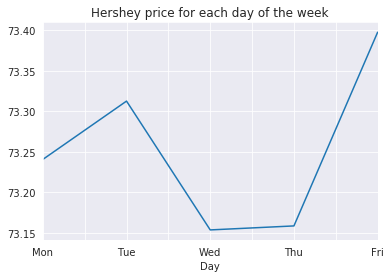

In [49]:
weekday['HSY'].plot(x = 'Day', kind='line', title='Hershey price for each day of the week')

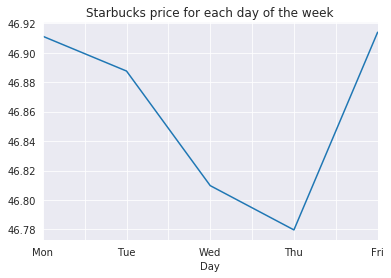

In [50]:
weekday['SBUX'].plot(x = 'Day', kind='line', title='Starbucks price for each day of the week')

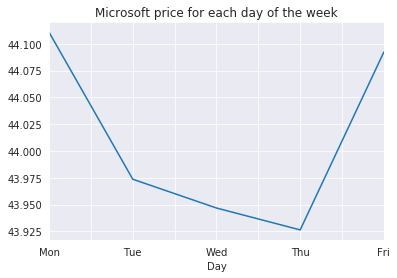

In [51]:
weekday['MSFT'].plot(x = 'Day', kind='line', title='Microsoft price for each day of the week')

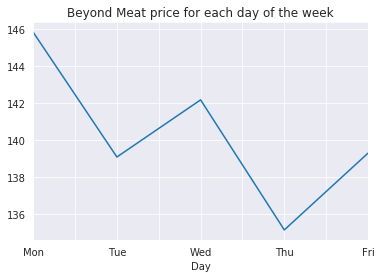

In [52]:
weekday['BYND'].plot(x = 'Day', kind='line', title='Beyond Meat price for each day of the week')

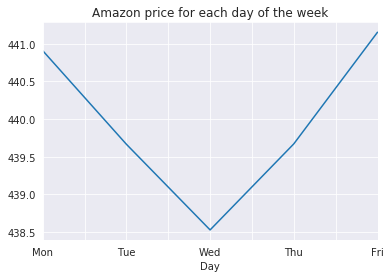

In [53]:
weekday['AMZN'].plot(x = 'Day', kind='line', title='Amazon price for each day of the week')

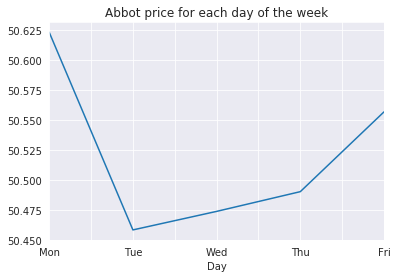

In [54]:
weekday['ABT'].plot(x = 'Day', kind='line', title='Abbot price for each day of the week')

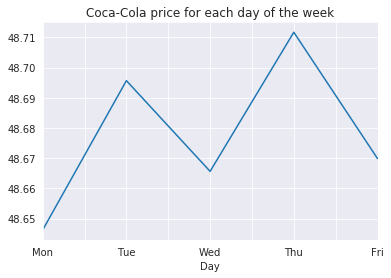

In [55]:
weekday['KO'].plot(x = 'Day', kind='line', title='Coca-Cola price for each day of the week')

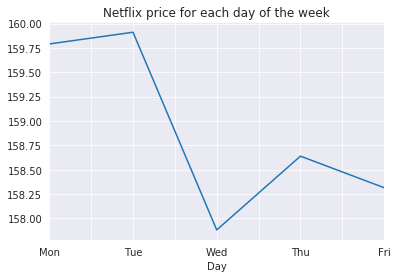

In [56]:
weekday['NFLX'].plot(x = 'Day', kind='line', title='Netflix price for each day of the week')

## Therefore, best time to buy stocks is on Wednesday after the market closes.

In [57]:
pct_chng.head()

HSY      SBUX      MSFT      AMZN      AAPL  MA       NEE  \
Date                                                                         
2005-01-24       NaN       NaN       NaN       NaN       NaN NaN       NaN   
2005-01-25  0.016637  0.001669  0.013635  0.013868  0.018231 NaN -0.010985   
2005-01-26  0.011384  0.024815 -0.000384  0.009770  0.002776 NaN  0.017879   
2005-01-27  0.023391 -0.041742  0.003845  0.023464  0.005398 NaN  0.000399   
2005-01-28 -0.003953  0.012634  0.002681 -0.002127  0.018447 NaN  0.005055   

                 NKE       DIS      CSCO  BYND       ABT      NFLX        KO  \
Date                                                                           
2005-01-24       NaN       NaN       NaN   NaN       NaN       NaN       NaN   
2005-01-25 -0.004866  0.030411 -0.013521   NaN -0.000435  0.017056  0.006836   
2005-01-26 -0.008616 -0.007639  0.010280   NaN -0.000436 -0.026478  0.010669   
2005-01-27  0.015267 -0.009797  0.027699   NaN -0.009370  0.016319  0.001919   
2005-01-28  0.000463 -0.002473 -0.015402   NaN -0.004179  0.020517 -0.006466   

                 DRI       UNP  
Date                            
2005-01-24       NaN       NaN  
2005-01-25  0.017297  0.007805  
2005-01-26  0.014878 -0.009091  
2005-01-27  0.014311  0.007985  
2005-01-28  0.000688 -0.007248

In [58]:
pct_chng.std()

HSY     0.013192
SBUX    0.022227
MSFT    0.016489
AMZN    0.024510
AAPL    0.026173
MA      0.026421
NEE     0.015825
NKE     0.022200
DIS     0.016005
CSCO    0.017848
BYND    0.083009
ABT     0.015262
NFLX    0.035925
KO      0.013712
DRI     0.020143
UNP     0.021184
dtype: float64

In [59]:
pct_chng.std().idxmax()

'BYND'

## Therefore, Beyond Meat is the riskiest stock at the moment.

In [60]:
pct_chng.std().idxmin()

'HSY'

## Therefore, Hershey is the least riskiest stock at the moment.

Text(0.5, 1.0, 'Percent change distribution for Hershey')

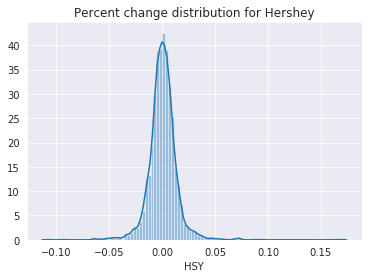

In [61]:
sns.distplot(pct_chng['HSY'][1:], bins=100)
plt.title('Percent change distribution for Hershey')

Text(0.5, 1.0, 'Percent change distribution for Starbucks')

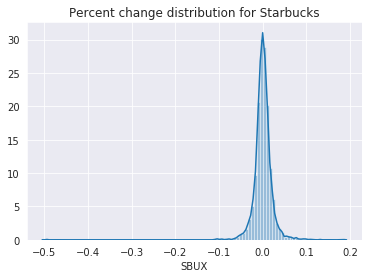

In [62]:
sns.distplot(pct_chng['SBUX'][1:], bins=100)
plt.title('Percent change distribution for Starbucks')

Text(0.5, 1.0, 'Percent change distribution for Netflix')

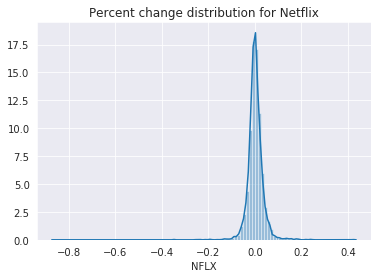

In [63]:
sns.distplot(pct_chng['NFLX'][1:], bins=100)
plt.title('Percent change distribution for Netflix')

Text(0.5, 1.0, 'Percent change distribution for Apple')

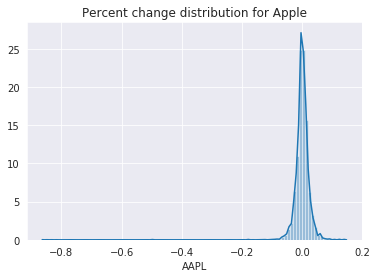

In [64]:
sns.distplot(pct_chng['AAPL'][1:], bins=100)
plt.title('Percent change distribution for Apple')

Text(0.5, 1.0, 'Percent change distribution for Microsoft')

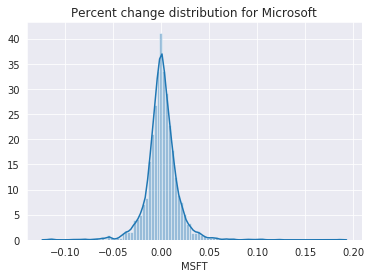

In [65]:
sns.distplot(pct_chng['MSFT'][1:], bins=100)
plt.title('Percent change distribution for Microsoft')

Text(0.5, 1.0, 'Percent change distribution for Abbot')

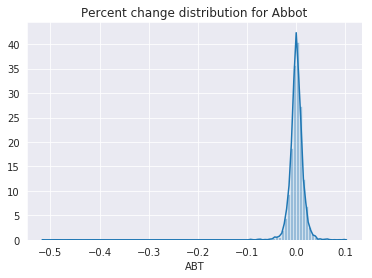

In [66]:
sns.distplot(pct_chng['ABT'][1:], bins=100)
plt.title('Percent change distribution for Abbot')

# Plotting closing price for each stock

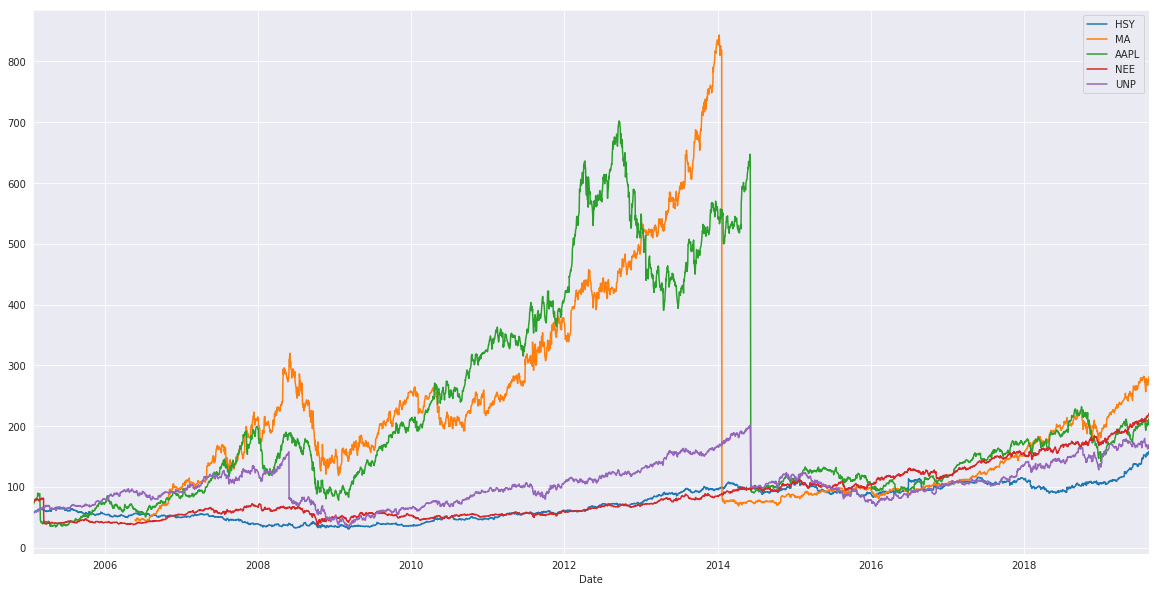

In [67]:
stocks = ['HSY', 'MA', 'AAPL', 'NEE', 'UNP']
for ticker in stocks:
    stocks_df[ticker]['close'].plot(kind='line', label=ticker, figsize=(20,10))
plt.legend()

In [68]:
stocks_df.xs(key='close', axis=1, level=1).iplot()

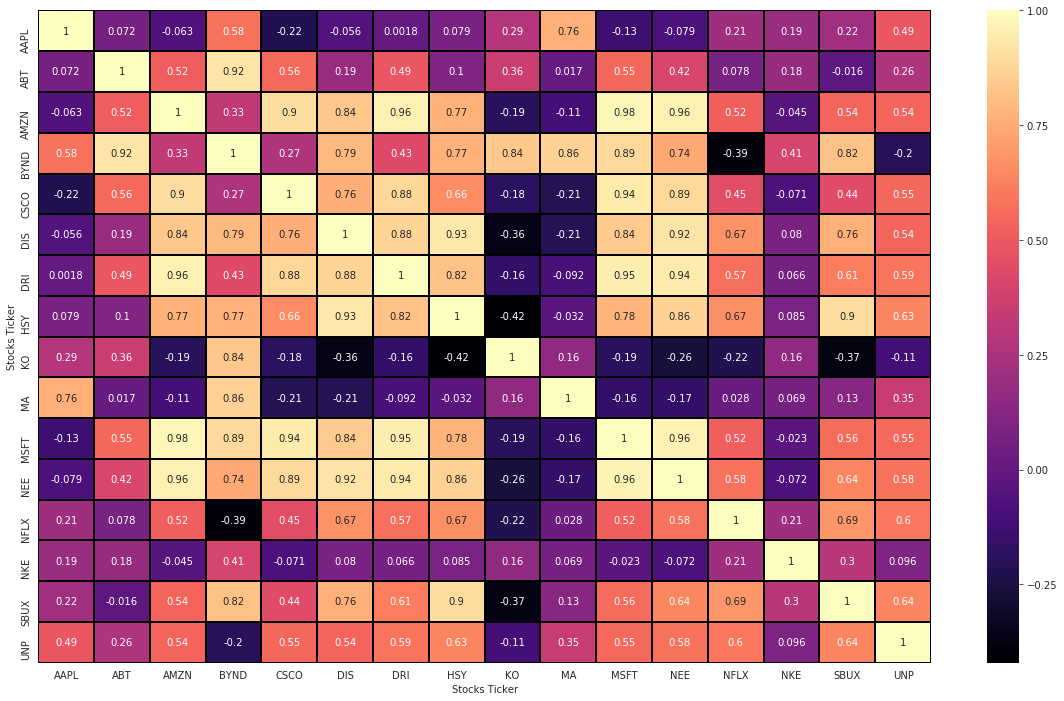

In [69]:
plt.figure(figsize=(20,12))
sns.heatmap(stocks_df.xs(key='close', axis=1, level=1).corr(), cmap='magma', lw=1.0, linecolor='black', annot=True)

<Figure size 1440x864 with 0 Axes>

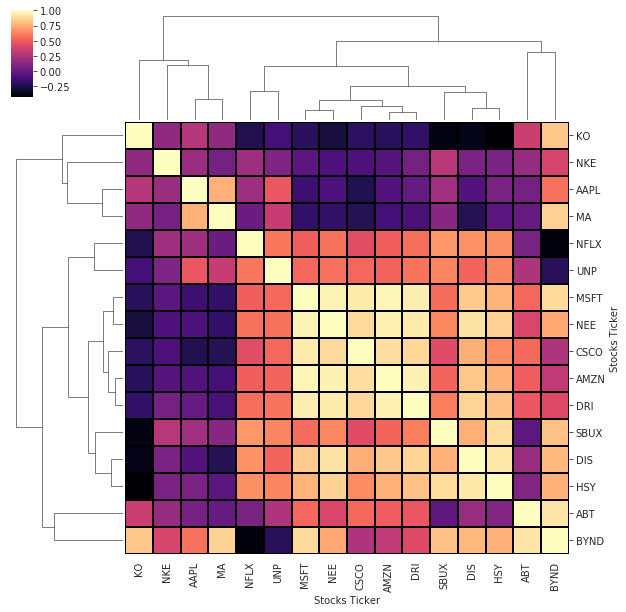

In [70]:
plt.figure(figsize=(20,12))
sns.clustermap(stocks_df.xs(key='close', axis=1, level=1).corr(), cmap='magma', lw=1.0, linecolor='black')

In [71]:
corr_data = stocks_df.xs(key='close', axis=1, level=1).corr()

In [72]:
corr_data

Stocks Ticker      AAPL       ABT      AMZN      BYND      CSCO       DIS  \
Stocks Ticker                                                               
AAPL           1.000000  0.071648 -0.063215  0.578501 -0.217367 -0.055694   
ABT            0.071648  1.000000  0.516460  0.924566  0.555723  0.187126   
AMZN          -0.063215  0.516460  1.000000  0.325136  0.904956  0.836903   
BYND           0.578501  0.924566  0.325136  1.000000  0.265186  0.794566   
CSCO          -0.217367  0.555723  0.904956  0.265186  1.000000  0.759158   
DIS           -0.055694  0.187126  0.836903  0.794566  0.759158  1.000000   
DRI            0.001785  0.488627  0.960419  0.430264  0.879339  0.877682   
HSY            0.078927  0.103747  0.769990  0.770801  0.659537  0.929925   
KO             0.288646  0.360475 -0.191612  0.838037 -0.180145 -0.364971   
MA             0.764759  0.016629 -0.106599  0.864713 -0.214582 -0.209703   
MSFT          -0.131458  0.546308  0.982736  0.894477  0.941528  0.841101   
NEE           -0.078602  0.416697  0.956057  0.743738  0.892911  0.919379   
NFLX           0.207159  0.077911  0.522119 -0.385750  0.448599  0.673582   
NKE            0.194713  0.183251 -0.045291  0.405637 -0.071453  0.080266   
SBUX           0.215299 -0.016355  0.537823  0.817366  0.440082  0.763499   
UNP            0.486291  0.263089  0.542324 -0.198219  0.548752  0.542623   

Stocks Ticker       DRI       HSY        KO        MA      MSFT       NEE  \
Stocks Ticker                                                               
AAPL           0.001785  0.078927  0.288646  0.764759 -0.131458 -0.078602   
ABT            0.488627  0.103747  0.360475  0.016629  0.546308  0.416697   
AMZN           0.960419  0.769990 -0.191612 -0.106599  0.982736  0.956057   
BYND           0.430264  0.770801  0.838037  0.864713  0.894477  0.743738   
CSCO           0.879339  0.659537 -0.180145 -0.214582  0.941528  0.892911   
DIS            0.877682  0.929925 -0.364971 -0.209703  0.841101  0.919379   
DRI            1.000000  0.822240 -0.162188 -0.091701  0.953006  0.943483   
HSY            0.822240  1.000000 -0.420756 -0.031514  0.777539  0.863510   
KO            -0.162188 -0.420756  1.000000  0.161853 -0.192415 -0.264026   
MA            -0.091701 -0.031514  0.161853  1.000000 -0.162700 -0.165161   
MSFT           0.953006  0.777539 -0.192415 -0.162700  1.000000  0.962405   
NEE            0.943483  0.863510 -0.264026 -0.165161  0.962405  1.000000   
NFLX           0.570610  0.668074 -0.222238  0.028375  0.517599  0.579829   
NKE            0.066014  0.085187  0.158641  0.068977 -0.022963 -0.071771   
SBUX           0.611982  0.895531 -0.373885  0.130745  0.557360  0.643955   
UNP            0.585850  0.634145 -0.105296  0.345685  0.554243  0.582971   

Stocks Ticker      NFLX       NKE      SBUX       UNP  
Stocks Ticker                                          
AAPL           0.207159  0.194713  0.215299  0.486291  
ABT            0.077911  0.183251 -0.016355  0.263089  
AMZN           0.522119 -0.045291  0.537823  0.542324  
BYND          -0.385750  0.405637  0.817366 -0.198219  
CSCO           0.448599 -0.071453  0.440082  0.548752  
DIS            0.673582  0.080266  0.763499  0.542623  
DRI            0.570610  0.066014  0.611982  0.585850  
HSY            0.668074  0.085187  0.895531  0.634145  
KO            -0.222238  0.158641 -0.373885 -0.105296  
MA             0.028375  0.068977  0.130745  0.345685  
MSFT           0.517599 -0.022963  0.557360  0.554243  
NEE            0.579829 -0.071771  0.643955  0.582971  
NFLX           1.000000  0.211186  0.685271  0.595553  
NKE            0.211186  1.000000  0.295155  0.095953  
SBUX           0.685271  0.295155  1.000000  0.635224  
UNP            0.595553  0.095953  0.635224  1.000000

In [73]:
corr_data.iplot(kind='heatmap', colorscale='RdYlBu')

# Candle stick plots

In [74]:
stocks_df.head()

Stocks Ticker   AAPL                                     ABT                \
Stock Info     close   high    low   open      volume  close   high    low   
Date                                                                         
2005-01-24     70.76  71.78  70.55  70.98  15029100.0  45.93  46.34  45.85   
2005-01-25     72.05  72.84  70.94  71.41  17307700.0  45.91  46.25  45.80   
2005-01-26     72.25  72.75  71.22  72.68  13205300.0  45.89  46.32  45.87   
2005-01-27     72.64  72.92  71.55  72.16   8861200.0  45.46  46.05  45.38   
2005-01-28     73.98  73.98  72.44  72.62  14314500.0  45.27  45.54  44.89   

Stocks Ticker                    ...   SBUX                                   \
Stock Info      open     volume  ...  close   high    low   open      volume   
Date                             ...                                           
2005-01-24     45.99  8083500.0  ...  53.91  55.66  52.41  55.56   7793300.0   
2005-01-25     45.94  5464100.0  ...  54.00  55.15  53.82  53.90   5090200.0   
2005-01-26     45.97  6843400.0  ...  55.34  55.41  53.87  54.49   5506900.0   
2005-01-27     45.79  8253800.0  ...  53.03  55.20  52.28  54.95  13350900.0   
2005-01-28     45.40  8599200.0  ...  53.70  53.70  52.10  53.25   6308000.0   

Stocks Ticker    UNP                                  
Stock Info     close   high    low   open     volume  
Date                                                  
2005-01-24     58.94  60.50  58.94  60.50  2683700.0  
2005-01-25     59.40  60.35  59.04  59.04  2386200.0  
2005-01-26     58.86  59.60  58.25  59.60  1841100.0  
2005-01-27     59.33  59.66  58.57  58.64  1083700.0  
2005-01-28     58.90  59.79  58.84  59.30  1356200.0  

[5 rows x 80 columns]

In [75]:
stocks_df.loc[datetime.date(2019,1,1):]['HSY'][['close', 'high', 'low', 'open']].iplot(kind='candle', title='Hershey gains/losses')

In [76]:
stocks_df.loc[datetime.date(2019,1,1):]['SBUX'][['close', 'high', 'low', 'open']].iplot(kind='candle', title='Starbucks gains/losses')

In [77]:
stocks_df.loc[datetime.date(2019,1,1):]['BYND'][['close', 'high', 'low', 'open']].iplot(kind='candle', title='Beyond Meat gains/losses')

In [78]:
stocks_df.loc[datetime.date(2019,1,1):]['AAPL'][['close', 'high', 'low', 'open']].iplot(kind='candle', title='Apple gains/losses')

In [79]:
stocks_df.loc[datetime.date(2019,1,1):]['ABT'][['close', 'high', 'low', 'open']].iplot(kind='candle', title='Abbot gains/losses')

In [80]:
stocks_df.loc[datetime.date(2019,1,1):]['MA'][['close', 'high', 'low', 'open']].iplot(kind='candle', title='Mastercard gains/losses')

In [81]:
stocks_df.loc[datetime.date(2019,1,1):]['CSCO'][['close', 'high', 'low', 'open']].iplot(kind='candle', title='Cisco gains/losses')

In [82]:
stocks_df.loc[datetime.date(2019,1,1):]['KO'][['close', 'high', 'low', 'open']].iplot(kind='candle', title='Coca-Cola gains/losses')

In [83]:
stocks_df.loc[datetime.date(2019,1,1):]['DIS'][['close', 'high', 'low', 'open']].iplot(kind='candle', title='Disney gains/losses')